In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.filterwarnings('ignore')



In [2]:
#Reading Data
df= pd.read_excel(r"C:\Users\Notebook\Desktop\train.xlsx")

In [3]:
df.head

<bound method NDFrame.head of        InvoiceNo StockCode                         Description  Quantity  \
0         558904     22292    HANGING CHICK  YELLOW DECORATION         1   
1         556072     20970  PINK FLORAL FELTCRAFT SHOULDER BAG         8   
2         551739     21559   STRAWBERRY LUNCH BOX WITH CUTLERY         2   
3         541658     21988        PACK OF 6 SKULL PAPER PLATES         1   
4         538364    85099C      JUMBO  BAG BAROQUE BLACK WHITE        10   
...          ...       ...                                 ...       ...   
541904    574102     22866       HAND WARMER SCOTTY DOG DESIGN        24   
541905    545226     22919                    HERB MARKER MINT        12   
541906    573160     22077              6 RIBBONS RUSTIC CHARM        12   
541907    552321     23204         CHARLOTTE BAG APPLES DESIGN        10   
541908    573359     21983    PACK OF 12 BLUE PAISLEY TISSUES          4   

               InvoiceDate  UnitPrice  CustomerID        

In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
#check for missing data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### when dealing with mssing data, we can use two primary methodes to solve the error :
#### imputation or the removal of data. the imputation is most useful when the percentage of missing data is low If the portion of missing data is too high, the results lack natural variation that could result in an effective model. The other option is to remove data. When dealing with data that is missing at random, related data can be deleted to reduce bias, in conclusion as I can not observe what is the type of missing data ((MAR),(MCAR),(MNAR)) I choose to drop missing data.

In [8]:
df= df.dropna(subset=['CustomerID'])

In [9]:
#check and clean duplicate data
df.duplicated().sum()

5225

In [10]:
df= df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


#### To describe our data; we can observe the number of data (401604), the Mean, Standard Deviation, the Minimum and Maximum value related to each column and also we have first quartile, semi interquartile and third qurtile of data according to each column.

In [13]:
#values for Quantity and UnitPrice could not be negative 
df= df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [14]:
df.shape

(392692, 8)

## cohort analysis

In [15]:
def get_month(x) : 
    return dt.datetime(x.year,x.month,1)
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
grouping = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
541897,549283,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,2011-04-07 13:32:00,4.95,13005.0,United Kingdom,2011-04-01,2011-04-01
541898,564496,22423,REGENCY CAKESTAND 3 TIER,1,2011-08-25 14:21:00,12.75,13050.0,United Kingdom,2011-08-01,2010-12-01
541899,577599,22083,PAPER CHAIN KIT RETROSPOT,6,2011-11-21 08:26:00,2.95,15738.0,United Kingdom,2011-11-01,2010-12-01
541900,578289,21793,CLASSIC FRENCH STYLE BASKET BROWN,1,2011-11-23 14:07:00,3.95,17841.0,United Kingdom,2011-11-01,2010-12-01
541902,543174,22085,PAPER CHAIN KIT SKULLS,6,2011-02-04 09:34:00,2.95,16938.0,United Kingdom,2011-02-01,2011-02-01
541904,574102,22866,HAND WARMER SCOTTY DOG DESIGN,24,2011-11-03 10:27:00,2.10,16128.0,United Kingdom,2011-11-01,2011-03-01
541905,545226,22919,HERB MARKER MINT,12,2011-03-01 09:33:00,0.65,12428.0,Finland,2011-03-01,2011-03-01
541906,573160,22077,6 RIBBONS RUSTIC CHARM,12,2011-10-28 08:58:00,1.95,14359.0,United Kingdom,2011-10-01,2011-09-01
541907,552321,23204,CHARLOTTE BAG APPLES DESIGN,10,2011-05-09 09:15:00,0.85,17049.0,United Kingdom,2011-05-01,2011-03-01
541908,573359,21983,PACK OF 12 BLUE PAISLEY TISSUES,4,2011-10-30 12:48:00,0.39,14178.0,United Kingdom,2011-10-01,2011-06-01


In [16]:
def get_monthInt (DataFrame,column):
    year = DataFrame[column].dt.year
    month = DataFrame[column].dt.month
    day = DataFrame[column].dt.day
    return year, month, day 

invoice_year,invoice_month,_ = get_monthInt(df,'InvoiceMonth')
cohort_year,cohort_month,_ = get_monthInt(df,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df['CohortIndex'] = year_diff * 12 + month_diff + 1

In [17]:
#Count monthly active customers from each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Retention Rate of customers

In [18]:
# Retention rate of customers
cohort_size = cohort_counts.iloc[:,0]
retention_rate = cohort_counts.divide(cohort_size,axis=0) #axis=0 divide along the row axis  
retention_rate.round(3) * 100 

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### describtion:  according to the table we can see retention  rate over user lifetime(horizental axis) and retetion over product lifetime 

## calculate RFM metrics

In [19]:
df["InvoiceDate"].max()
df["InvoiceDate"].min()
df['TotalPrice'] = df['UnitPrice']* df['Quantity']
today_date = df['InvoiceDate'].max() + dt.timedelta(days=1)  #Type information is checked
print('max Invoice Date:',df.InvoiceDate.dt.date.max(),'min Invoice Date:',
       df.InvoiceDate.dt.date.min(), 'today_date:', df['InvoiceDate'].max() + dt.timedelta(days=1))

max Invoice Date: 2011-12-09 min Invoice Date: 2010-12-01 today_date: 2011-12-10 12:50:00


In [20]:
# calculating elements of RFM table
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo': lambda InvoiceNo: InvoiceNo.count(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})
rfm.head()             
rfm.columns = ['Recency', 'Frequency', 'Monetary']  #name the variables as we want.
rfm.describe().T
rfm = rfm[rfm["Monetary"] > 0]
rfm.shape #size of new dataset
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


## Calculating RFM Scores

#### The RFM score is calculated as follows:

####  • The Recency value when the transaction (day of analysis — date of last purchase) was performed.
####  • After groupby according to the Customer ID variable, the Frequency score was calculated by bringing the sum of the invoiceNo            variable.
#### • Monetary score was calculated by performing the groupby operation according to the Customer ID variable and bringing the                sum of the TotalPrice variable.
#### • qcut() function: Discretize variables into equal-sized buckets based on rank or based on sample quantiles.

In [21]:
R_Quartiles = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])

F_Quartiles = pd.qcut(rfm['Frequency'].rank(method="first"), 4, labels=[1,2,3,4])

M_Quartiles = pd.qcut(rfm['Monetary'], 4, labels= [1,2,3,4])

rfm = rfm.assign(R= R_Quartiles, F= F_Quartiles, M= M_Quartiles)

#preparing RFM segments as well as scores
def add_rfm(x) : 
    return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head(5)

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,310,17,334.40,1,1,2,1.01.02.0,4


In [24]:
#Top customers are shown "444"
rfm[rfm['RFM_Segment']=='444'].head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,


In [25]:
#The worst customers are shown "111"
rfm[rfm['RFM_Segment']=='111'].head(5)

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,


In [26]:
rfm.groupby('RFM_Score').agg({'Recency': ['mean','count'],
                              'Frequency': ['mean', 'count'],
                              'Monetary': ['mean', 'count'] }).round(2)


Recency       Frequency       Monetary      
             mean count      mean count     mean count
RFM_Score                                             
3          259.79   371      7.96   371   156.13   371
4          179.90   391     13.62   391   237.64   391
5          153.71   517     20.98   517   365.51   517
6           96.97   458     27.84   458   819.43   458
7           79.94   461     37.73   461   750.93   461
8           64.19   458     55.91   458   985.96   458
9           46.27   415     78.78   415  1793.16   415
10          32.24   429    110.06   429  2044.69   429
11          21.36   387    186.79   387  4062.78   387
12           7.25   451    367.23   451  9269.91   451

In [27]:
rfm_discription= rfm[["Recency", "Frequency", "Monetary"]]
rfm_discription.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,90.523744,2048.688081
std,100.014169,225.506968,8985.230220
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,306.482500
50%,51.000000,41.000000,668.570000
75%,142.000000,98.000000,1660.597500
max,374.000000,7676.000000,280206.020000


In [55]:
def segments(df):
    if df['RFM_Score'] > 9 :
        return 'Champions'
    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9 ):
        return 'Need_attentio'
    else:  
        return 'At_Risk'

rfm['General_Segment'] = rfm.apply(segments,axis=1)

rfm.groupby('General_Segment').agg({'Recency':['mean','count'],
                                    'Frequency':['mean','count'],
                                    'Monetary':['mean','count']}).round(1)

Recency       Frequency       Monetary      
                   mean count      mean count     mean count
General_Segment                                             
At_Risk           192.5  1279      15.0  1279    265.7  1279
Champions          20.0  1267     225.0  1267   5233.0  1267
Need_attentio      72.5  1792      49.4  1792   1069.9  1792

#### Largest RFM segments It is always the best practice to investigate the size of the segments before you use them for targeting or other business Application.
#### we can sort values in ascending type the result could be below:
### RFM_Segment
## 444                        450
#### 111                         381
#### 344                         217
#### 122                         206
#### 211                         179




### K-means Clustering algorithms

#### Clustering is the task of gathering samples into groups of similar samples according to some predefined similarity or distance (dissimilarity) measure, such as the Euclidean distance.
here we normalize data for better visualization because our data are not symmetrically distributed because Mean and Varince are not equal so we standardized our data

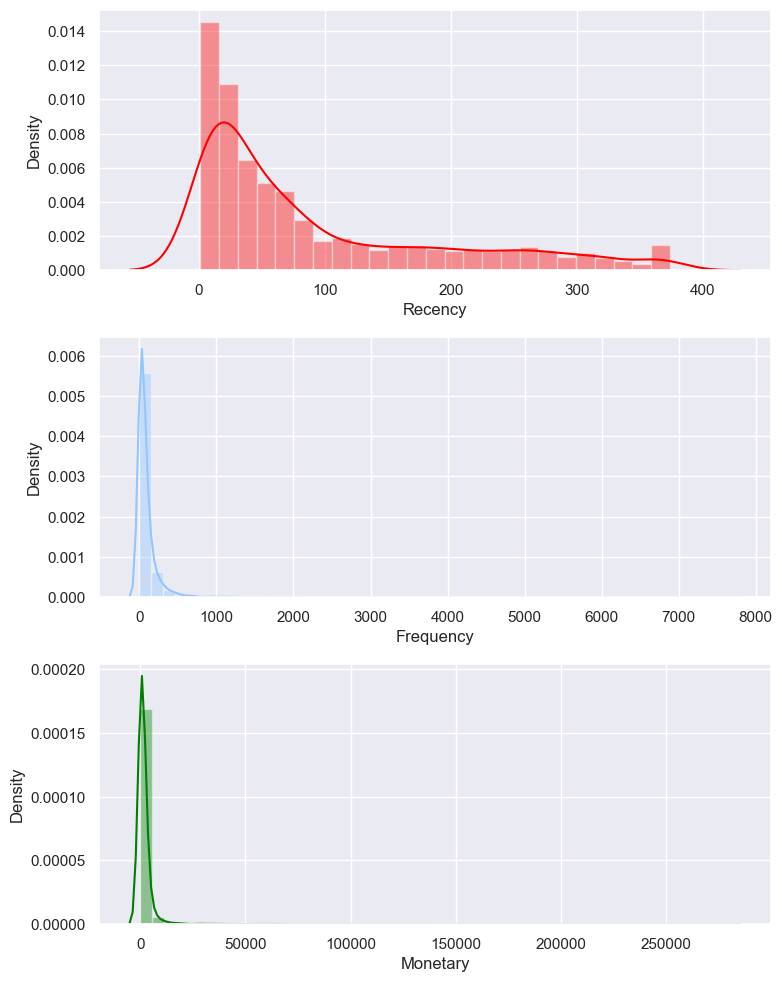

In [56]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(8,10))
plt.subplot(311)
sns.distplot(rfm.Recency, label = 'Recency', color= 'red')

plt.subplot(312)
sns.distplot(rfm.Frequency, label = 'Frequency')

plt.subplot(313)
sns.distplot(rfm.Monetary, label = 'Monetary', color= 'green')

plt.style.use('seaborn-pastel')
plt.tight_layout()
plt.show()

#### skewed distribution is neither symmetric nor normal because the data values trail off more sharply on one side than on the other. In business, you often find skewness in data sets that represent sizes using positive numbers (eg, sales or assets). The reason is that data values cannot be less than zero (imposing a boundary on one side) but are not restricted by a definite upper boundary. The result is that there are many data values concentrated near zero, and they become systematically fewer and fewer as you move to the right in the histogram.
#### How do you solve skewed distributions?
#### Dealing with skew data:
#### log transformation(only works with positive data): to solve skewness of data
#### Normalize the data (in order to work with same Mean and Std values)


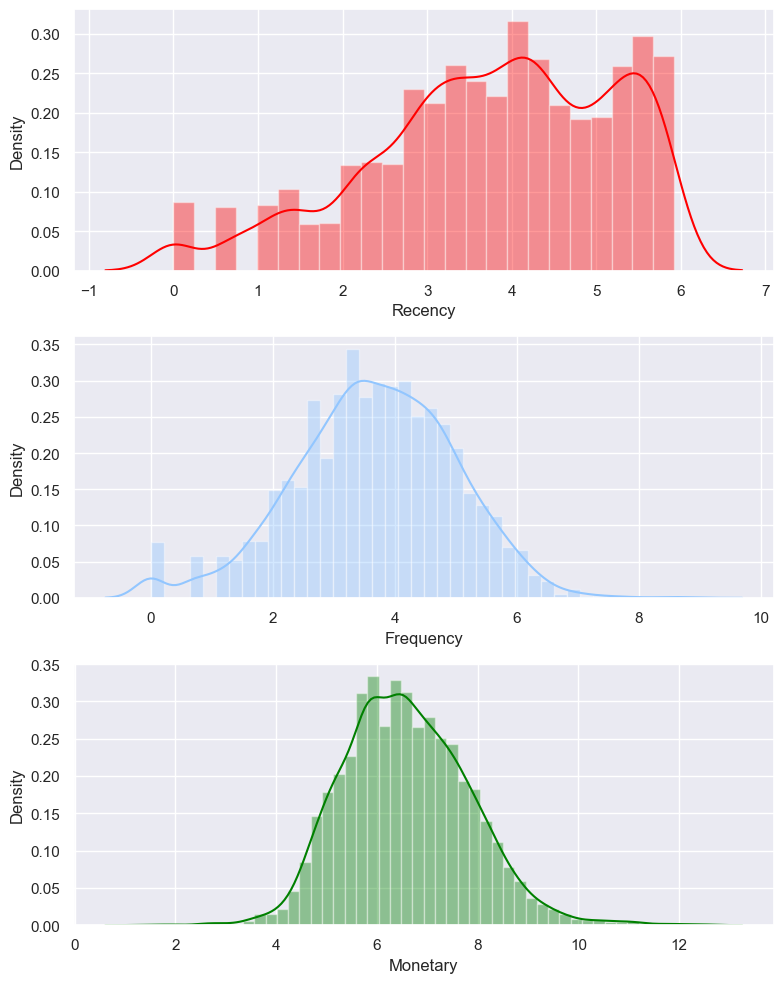

In [57]:
#Unskew the data with log transformation
logtransform = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(2)

f,ax = plt.subplots(figsize=(8, 10))
plt.subplot(311) 
sns.distplot(logtransform .Recency, label = 'Recency', color= 'red')

plt.subplot(312)
sns.distplot(logtransform .Frequency, label = 'Frequency')

plt.subplot(313) 
sns.distplot(logtransform.Monetary, label = 'Monetary', color= 'green')

plt.style.use('seaborn-pastel')
plt.tight_layout()
plt.show()

### K-means Clustering algorithms
### Clustering is the task of gathering samples into groups of similar samples according to some predefined ###      similarity or distance (dissimilarity) measure, such as the Euclidean distance.


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#preprocessing data
st_scaler= StandardScaler()
st_scaler.fit(logtransform)
normalized= st_scaler.transform(logtransform)

### Choosing number of clusters 
#### The Elbow Method
#### The Elbow method is a "rule-of-thumb" approach to finding the optimal number of clusters. Here, we look at the cluster  ####dispersion for different values of k


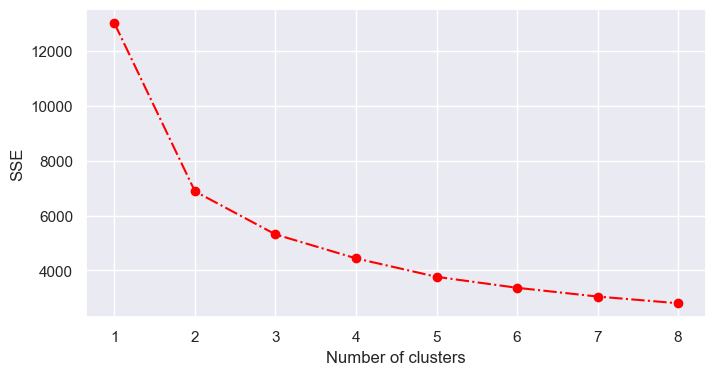

In [59]:
SSE = []
for i in range(1,9):
    km = KMeans(n_clusters=i, random_state=0).fit(normalized)
    SSE.append(km.inertia_) # The lowest SSE value

plt.figure(figsize=(8, 4))
plt.plot(range(1, 9), SSE, marker='o', linestyle = '-.', color='red')
plt.xticks(range(1, 9))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#### so the number of clusters is 3

In [60]:
# #clustering and fit our model to the data
# kmeans = KMeans(n_clusters = 3, random_state = 1)
# kmeans.fit(normalized)


# # We create a new data frame with the original features and add a new column with the assigned clusters for each point.
# df_segm_kmeans= rfm_discription.copy()
# rfm_discription['Segment K-means'] = kmeans.labels_


# df_segm_analysis = rfm_discription.groupby(['Segment K-means']).mean().round(0)
# df_segm_analysis



# clustering
kmeans = KMeans(n_clusters= 3, random_state=1)
kmeans.fit(normalized)

#Create a cluster label column in the original DataFrame
cluster_labels = kmeans.labels_

#Calculate average RFM values and size for each cluster:
rfm_discription_k3 = rfm_discription.assign(K_Cluster = cluster_labels)

#Calculate average RFM values and sizes for each cluster:
rfm_discription_k3.groupby('K_Cluster').agg({'Recency': ['mean', 'count'],
                                             'Frequency': ['mean', 'count'],
                                         'Monetary': ['mean', 'count'],}).round(0)

Recency       Frequency       Monetary      
             mean count      mean count     mean count
K_Cluster                                             
0           171.0  1527      15.0  1527    293.0  1527
1            13.0   955     260.0   955   6564.0   955
2            69.0  1856      65.0  1856   1170.0  1856

In [68]:
df_segm_analysis.rename({0:'At_Risk',
                         1:'Attention_need_customers',
                         2:'Champions'})

,Recency,Frequency,Monetary
Segment K-means,,,
At_Risk,171.0,15.0,293.0
Attention_need_customers,13.0,260.0,6564.0
Champions,69.0,65.0,1170.0


In [65]:
# the mean value in total 
total_avg = rfm.iloc[:, 0:3].mean()
# calculate the proportional gap with total mean
cluster_avg = rfm.groupby('General_Segment').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
prop_rfm.round(2)

,Recency,Frequency,Monetary
General_Segment,,,
At_Risk,1.08,-0.83,-0.87
Champions,-0.78,1.49,1.55
Need_attentio,-0.22,-0.45,-0.48


In [67]:
# The further a ratio is from 0, the more important that attribute is for a segment relative to the total population
cluster_avg = rfm_discription_k3.groupby(['K_Cluster']).mean()
population_avg = rfm_discription.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,Monetary,Segment K-means
K_Cluster,,,,
0,0.85,-0.84,-0.86,-1.00
1,-0.86,1.87,2.20,-0.07
2,-0.25,-0.28,-0.43,0.86
